In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats    
import math
from sklearn.decomposition import PCA
import warnings
from mpl_toolkits.mplot3d import axes3d, Axes3D
warnings.filterwarnings("ignore")

In [17]:
covit=np.log10(pd.read_csv("dpc-covid19-ita-andamento-nazionale.csv").drop(["stato"], axis=1).set_index("data"))
covit

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,
2020-02-24 18:00:00,2.004321,1.414973,2.103804,1.973128,2.344392,2.344392,0.000000,0.845098,2.359835,3.635886
2020-02-25 18:00:00,2.056905,1.544068,2.176091,2.209515,2.492760,1.954243,0.000000,1.000000,2.507856,3.935658
2020-02-26 18:00:00,2.107210,1.556303,2.214844,2.344392,2.585461,1.869232,0.477121,1.079181,2.602060,3.981683
2020-02-27 18:00:00,2.394452,1.748188,2.482874,2.453318,2.769377,2.307496,1.653213,1.230449,2.812913,4.079688
2020-02-28 18:00:00,2.537819,1.806180,2.611723,2.614897,2.914343,2.367356,1.662758,1.322219,2.948413,4.195761
2020-02-29 18:00:00,2.603144,2.021189,2.704151,2.734800,3.020775,2.357935,1.698970,1.462398,3.052309,4.270935
2020-03-01 18:00:00,2.805501,2.146128,2.891537,2.902003,3.197832,2.722634,1.919078,1.531479,3.228913,4.324838
2020-03-02 18:00:00,2.870404,2.220108,2.958086,2.967080,3.263636,2.411620,2.173186,1.716003,3.308778,4.368194
2020-03-03 18:00:00,3.014521,2.359835,3.101403,3.000000,3.354685,2.631444,2.204120,1.897627,3.398287,4.412561


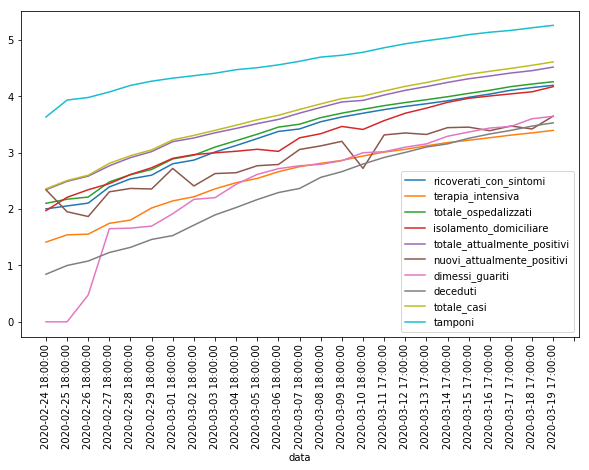

In [18]:
ax=covit.plot.line(figsize=(10, 6), xticks=np.linspace(0, len(covit.index), len(covit.index)+1))
fig=ax.set_xticklabels(covit.index, rotation=90)

In [19]:
pca = PCA(n_components=3)
vecs = pca.fit_transform(covit)
vecs1 = pca.fit_transform(covit.T)
print(vecs.shape)
print(vecs1.shape)

(25, 3)
(10, 3)


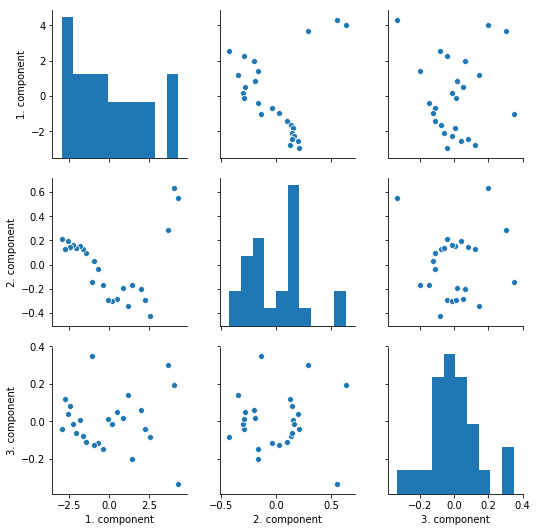

In [20]:
sns.pairplot(pd.DataFrame(vecs, columns=["1. component", "2. component", "3. component"]))

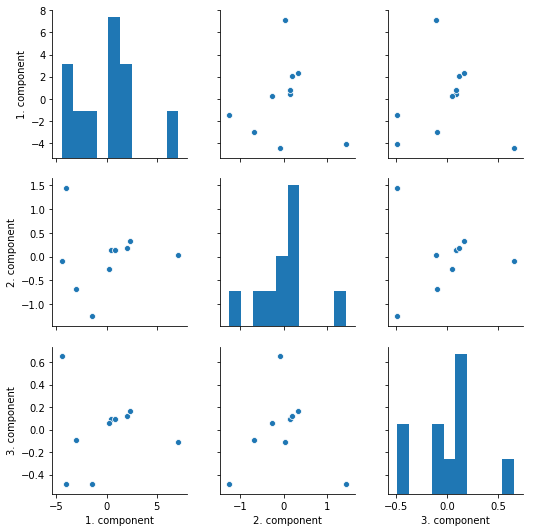

In [21]:
sns.pairplot(pd.DataFrame(vecs1, columns=["1. component", "2. component", "3. component"]))

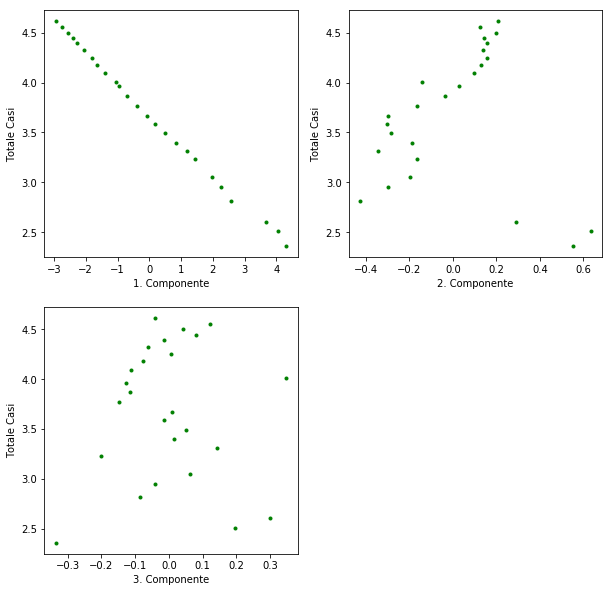

In [22]:
counter = 0
plt.figure(figsize=(10, 10))

for i in range(len(vecs[0,:])):
    plt.subplot(2,2,counter+1)
    plt.plot(vecs[:,i], covit["totale_casi"], "g.")
    plt.xlabel(str(i+1) + ". Componente")
    plt.ylabel("Totale Casi")
    counter += 1

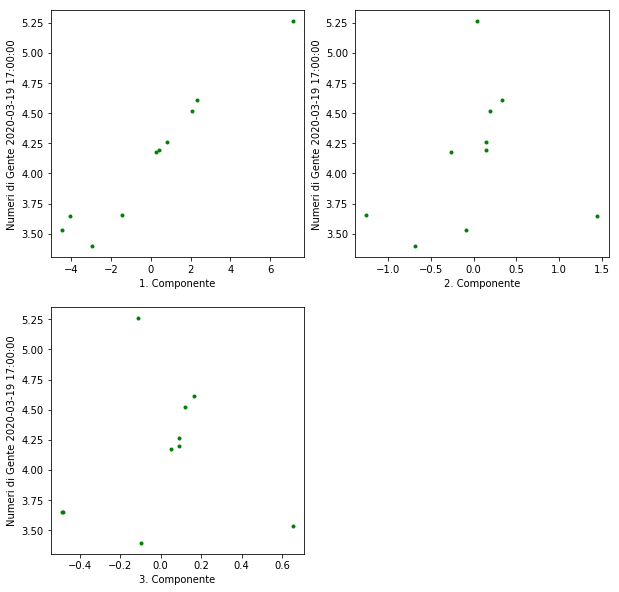

In [23]:
counter = 0
plt.figure(figsize=(10, 10))

for i in range(len(vecs1[0,:])):
    plt.subplot(2,2,counter+1)
    plt.plot(vecs1[:,i], covit.loc[covit.index[-1],:], "g.")
    plt.xlabel(str(i+1) + ". Componente")
    plt.ylabel("Numeri di Gente "+covit.index[-1])
    counter += 1

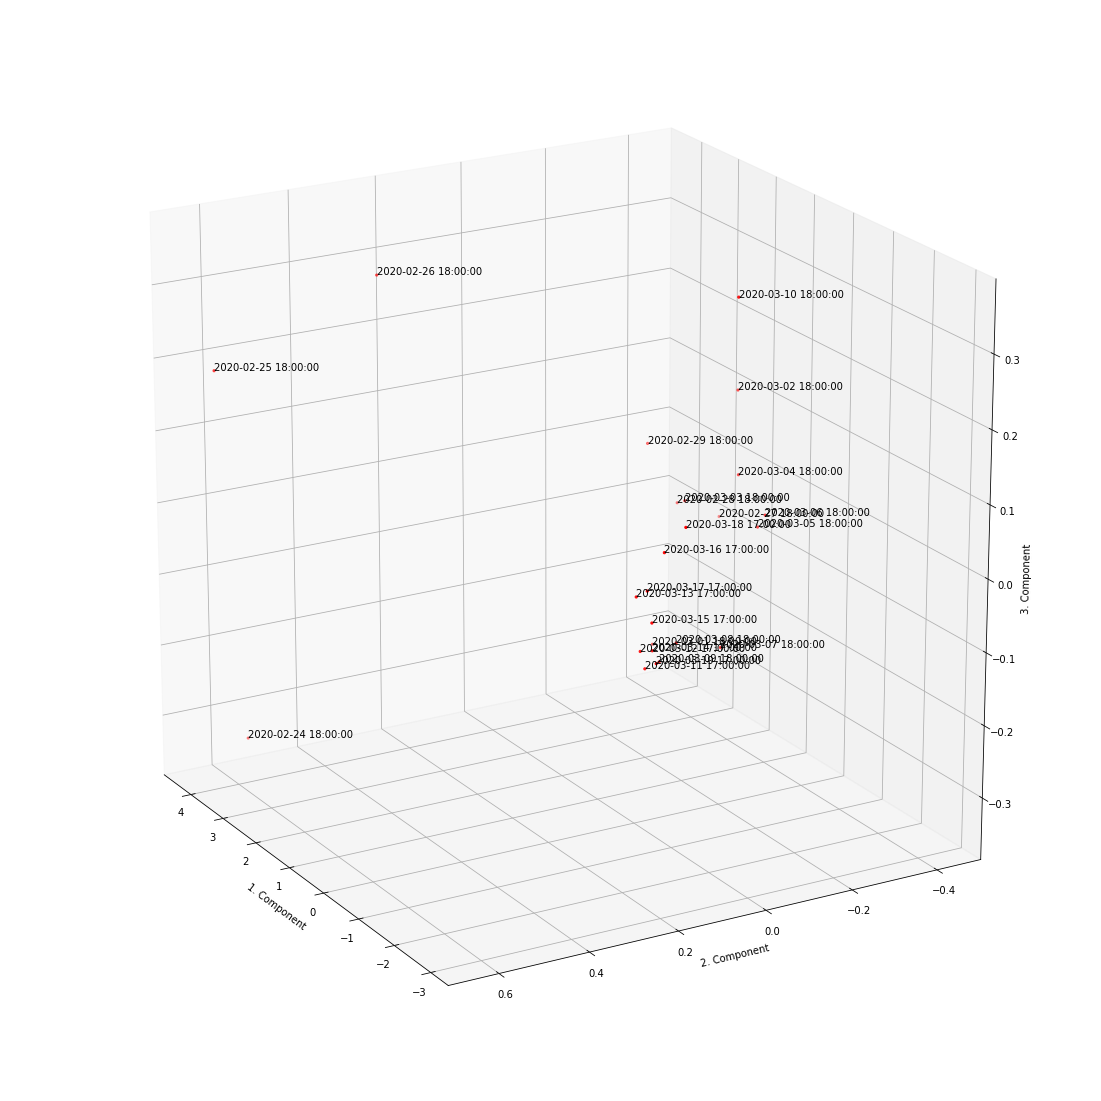

In [51]:
fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)

ax.scatter(vecs[:,0], vecs[:,1], vecs[:,2], marker=".", facecolor="r")
labels=[item for item in covit.index]
for i in range(len(covit.index)):
    ax.text(vecs[i,0], vecs[i,1], vecs[i,2], labels[i])

ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')
ax.set_zlabel('3. Component')
ax.view_init(elev=20, azim=150)

plt.show()

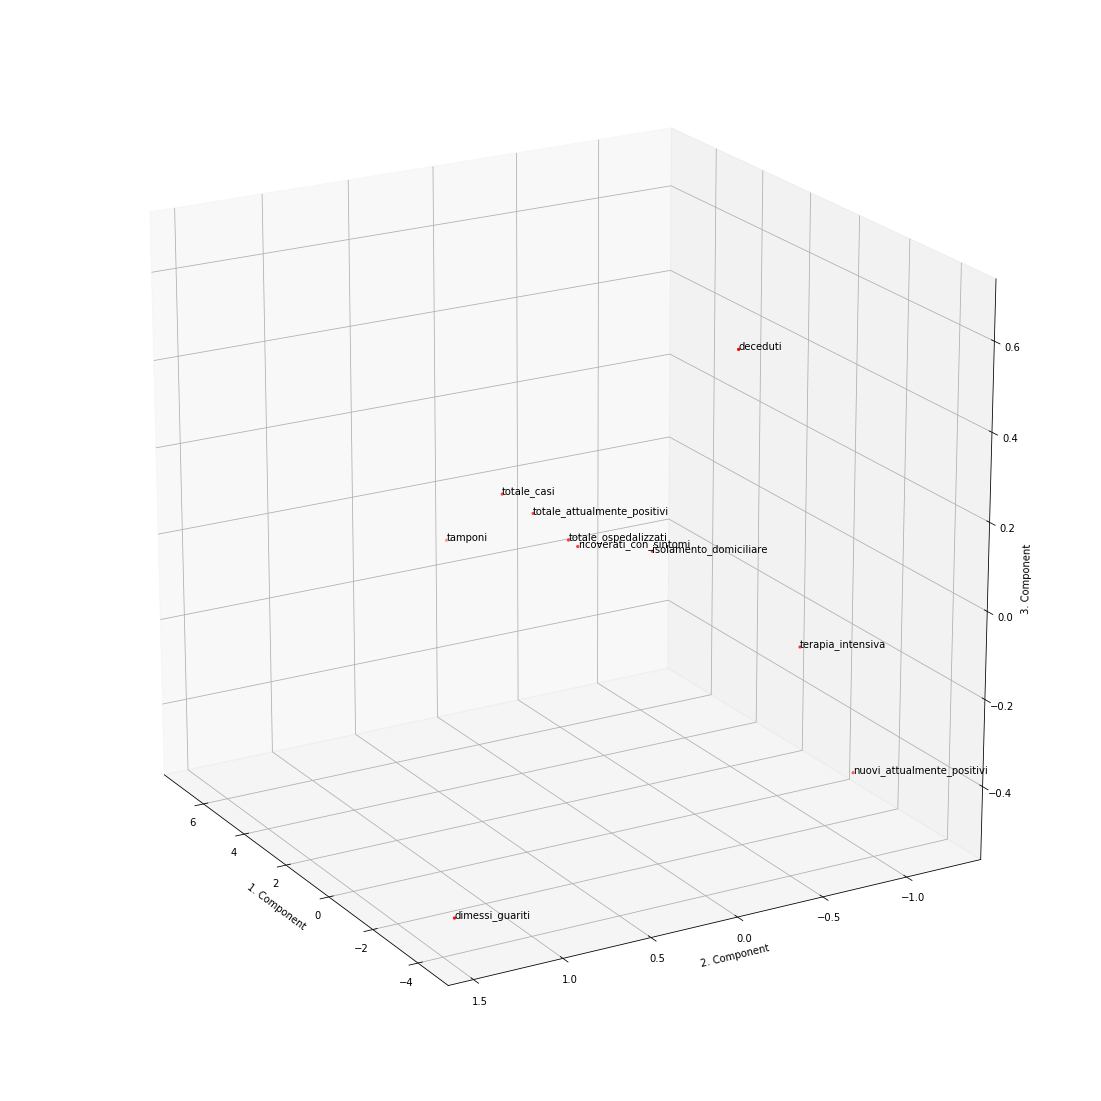

In [52]:
fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)

ax.scatter(vecs1[:,0], vecs1[:,1], vecs1[:,2], marker=".", facecolor="r")

for i in range(len(covit.columns)):
    ax.text(vecs1[i,0], vecs1[i,1], vecs1[i,2], covit.columns[i])

ax.set_xlabel('1. Component')
ax.set_ylabel('2. Component')
ax.set_zlabel('3. Component')
ax.view_init(elev=20, azim=150)

plt.show()

In [25]:
for i in range(len(vecs[0,:])):
    print(pd.DataFrame(vecs, index=covit.index).sort_values(i, ascending=False).iloc[0:3, i])

data
2020-02-24 18:00:00    4.312025
2020-02-25 18:00:00    4.045970
2020-02-26 18:00:00    3.677101
Name: 0, dtype: float64
data
2020-02-25 18:00:00    0.633313
2020-02-24 18:00:00    0.553711
2020-02-26 18:00:00    0.289887
Name: 1, dtype: float64
data
2020-03-10 18:00:00    0.348546
2020-02-26 18:00:00    0.300446
2020-02-25 18:00:00    0.196051
Name: 2, dtype: float64


In [47]:
covit.loc["2020-02-26 18:00:00"]

ricoverati_con_sintomi         2.107210
terapia_intensiva              1.556303
totale_ospedalizzati           2.214844
isolamento_domiciliare         2.344392
totale_attualmente_positivi    2.585461
nuovi_attualmente_positivi     1.869232
dimessi_guariti                0.477121
deceduti                       1.079181
totale_casi                    2.602060
tamponi                        3.981683
Name: 2020-02-26 18:00:00, dtype: float64

Text(0,0.5,'2. component')

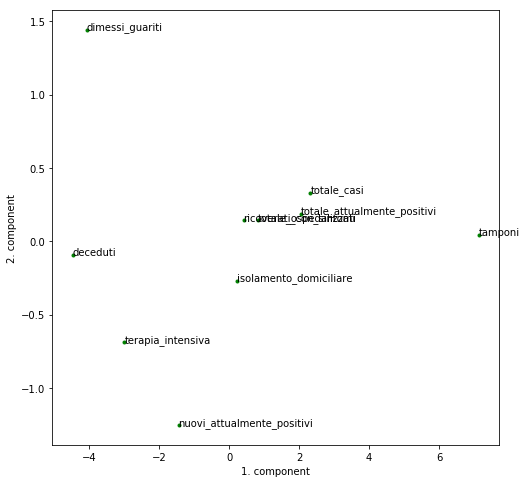

In [54]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()

ax.plot(vecs1[:,0], vecs1[:,1], "g.")
for i in range(len(covit.columns)):
    ax.annotate(covit.columns[i], (vecs1[i,0], vecs1[i,1]))
plt.xlabel("1. component")
plt.ylabel("2. component")

In [30]:
for i in range(len(vecs1[0,:])):
    print(pd.DataFrame(vecs1, index=covit.columns).sort_values(i, ascending=False).iloc[0:3, i])

tamponi                        7.128737
totale_casi                    2.323249
totale_attualmente_positivi    2.053175
Name: 0, dtype: float64
dimessi_guariti                1.442855
totale_casi                    0.332247
totale_attualmente_positivi    0.187996
Name: 1, dtype: float64
deceduti                       0.652559
totale_casi                    0.165759
totale_attualmente_positivi    0.118963
Name: 2, dtype: float64


In [31]:
for i in range(len(vecs1[0,:])):
    print(pd.DataFrame(vecs1, index=covit.columns).sort_values(i, ascending=True).iloc[0:3, i])

deceduti            -4.468134
dimessi_guariti     -4.064824
terapia_intensiva   -2.989193
Name: 0, dtype: float64
nuovi_attualmente_positivi   -1.252153
terapia_intensiva            -0.687261
isolamento_domiciliare       -0.267196
Name: 1, dtype: float64
nuovi_attualmente_positivi   -0.485991
dimessi_guariti              -0.483857
tamponi                      -0.110884
Name: 2, dtype: float64
